In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = pd.read_csv('Linear_X_Train.csv')
y = pd.read_csv('Linear_Y_Train.csv')
x = x.values
y = y.values

(3750, 1)
(3750, 1)


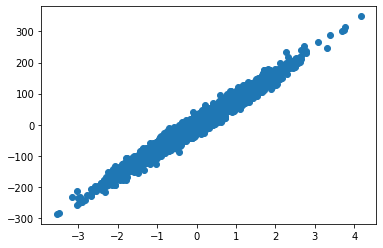

In [3]:
print(x.shape)
print(y.shape)
x = (x - x.mean())/x.std()
plt.scatter(x, y)

(2,)


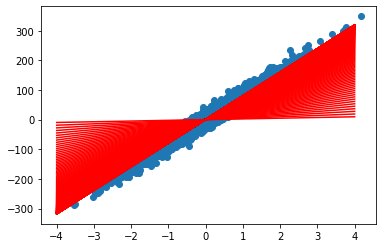

In [4]:
plt.scatter(x, y)
x_test = np.arange(-4, 5)
def hypothesis(x, theta):
    return theta[0] + theta[1]*x
def error(x, y, theta):
    err = 0
    for i in range(x.shape[0]):
        hx = hypothesis(x[i], theta)
        err += (hx - y[i])**2
    return err
def gradient(x, y, theta):
    grad = np.zeros(2)
    for i in range(x.shape[0]):
        hx = hypothesis(x[i], theta);
        grad[0] += (hx - y[i])
        grad[1] += (hx - y[i])*x[i]
    return grad
def gradient_descent(x, y, learning_rate = 0.000008):
    err = []
    theta = np.zeros(2)
    print(theta.shape)
    for i in range(200):
        err.append(error(x, y, theta))
        grad = gradient(x, y, theta)
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        plt.plot(x_test, hypothesis(x_test, theta), color = 'r')
    return theta, err
theta , err = gradient_descent(x, y)


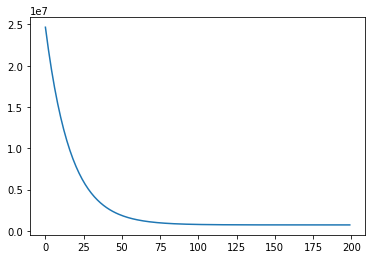

In [5]:
plt.plot(err)

In [6]:
X = pd.read_csv("Linear_X_Test.csv")
X = X.values
X = (X - x.mean())/x.std()
result = open("Y.csv", 'w')

In [7]:
result.write("y\n")
for val in X:
    curr_result = hypothesis(val, theta)[0]
    result.write(str(curr_result) + "\n")
result.close()